In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | airai
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | mugur-aksy
Processing Record 9 of Set 1 | amderma
City not found. Skipping...
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | urengoy
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | pacifica
Processing Record 21 of Set 1 | gushikawa
Processing Record 22 

Processing Record 34 of Set 4 | batagay-alyta
Processing Record 35 of Set 4 | kiruna
Processing Record 36 of Set 4 | kruisfontein
Processing Record 37 of Set 4 | new norfolk
Processing Record 38 of Set 4 | rorvik
Processing Record 39 of Set 4 | turayf
Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | thompson
Processing Record 45 of Set 4 | rassvet
Processing Record 46 of Set 4 | mehamn
Processing Record 47 of Set 4 | dwarka
Processing Record 48 of Set 4 | waingapu
Processing Record 49 of Set 4 | saint-pierre
Processing Record 50 of Set 4 | taksimo
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | quelimane
Processing Record 3 of Set 5 | kulhudhuffushi
Processing Record 4 of Set 5 | bossangoa
Processing Record 5 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 6 of Set 5 | farafangana
Process

Processing Record 24 of Set 8 | hovd
Processing Record 25 of Set 8 | los llanos de aridane
Processing Record 26 of Set 8 | pedernales
Processing Record 27 of Set 8 | samdari
Processing Record 28 of Set 8 | vila velha
Processing Record 29 of Set 8 | mandiana
Processing Record 30 of Set 8 | chuy
Processing Record 31 of Set 8 | macusani
Processing Record 32 of Set 8 | ulaangom
Processing Record 33 of Set 8 | churapcha
Processing Record 34 of Set 8 | tevriz
Processing Record 35 of Set 8 | ternate
Processing Record 36 of Set 8 | dinar
Processing Record 37 of Set 8 | gamba
Processing Record 38 of Set 8 | loa janan
Processing Record 39 of Set 8 | vilyuysk
Processing Record 40 of Set 8 | zongolica
Processing Record 41 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 42 of Set 8 | oshawa
Processing Record 43 of Set 8 | baruun-urt
Processing Record 44 of Set 8 | mattru
Processing Record 45 of Set 8 | atambua
Processing Record 46 of Set 8 | chagda
City not found. Skipping...
Pr

Processing Record 12 of Set 12 | yilan
Processing Record 13 of Set 12 | barabash
Processing Record 14 of Set 12 | pierre
Processing Record 15 of Set 12 | maryborough
Processing Record 16 of Set 12 | baykit
Processing Record 17 of Set 12 | mozarlandia
Processing Record 18 of Set 12 | hay river
Processing Record 19 of Set 12 | yatou
Processing Record 20 of Set 12 | bull savanna
Processing Record 21 of Set 12 | ust-nera
Processing Record 22 of Set 12 | kemijarvi
City not found. Skipping...
Processing Record 23 of Set 12 | russkiy kameshkir
Processing Record 24 of Set 12 | muros
Processing Record 25 of Set 12 | port macquarie
Processing Record 26 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 27 of Set 12 | huainan
Processing Record 28 of Set 12 | hofn
Processing Record 29 of Set 12 | labutta
City not found. Skipping...
Processing Record 30 of Set 12 | snasa
Processing Record 31 of Set 12 | caravelas
Processing Record 32 of Set 12 | chegdomyn
Processing Record 33 of Set 

In [6]:
len(city_data)

537

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,60.01,73,70,10.00,NZ,2020-02-19 05:56:30
1,Saint-Philippe,-21.36,55.77,84.20,69,5,24.16,RE,2020-02-19 05:56:31
2,Airai,-8.93,125.41,76.82,81,69,2.98,TL,2020-02-19 05:56:31
3,Castro,-24.79,-50.01,65.62,98,100,0.63,BR,2020-02-19 05:56:31
4,Butaritari,3.07,172.79,84.11,77,17,18.52,KI,2020-02-19 05:56:31
5,Albany,42.60,-73.97,39.20,86,90,11.41,US,2020-02-19 05:54:50
6,Hobart,-42.88,147.33,62.01,47,40,20.80,AU,2020-02-19 05:52:07
7,Mugur-Aksy,50.35,90.50,3.56,68,31,5.88,RU,2020-02-19 05:56:32
8,Atuona,-9.80,-139.03,81.72,81,54,20.80,PF,2020-02-19 05:56:32
9,Bethel,41.37,-73.41,43.00,100,90,3.36,US,2020-02-19 05:56:14


In [8]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-02-19 05:56:30,-46.19,168.86,60.01,73,70,10.00
1,Saint-Philippe,RE,2020-02-19 05:56:31,-21.36,55.77,84.20,69,5,24.16
2,Airai,TL,2020-02-19 05:56:31,-8.93,125.41,76.82,81,69,2.98
3,Castro,BR,2020-02-19 05:56:31,-24.79,-50.01,65.62,98,100,0.63
4,Butaritari,KI,2020-02-19 05:56:31,3.07,172.79,84.11,77,17,18.52


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

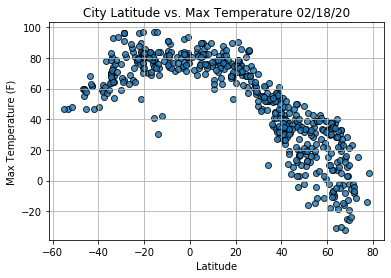

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

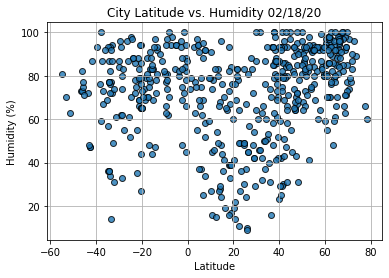

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

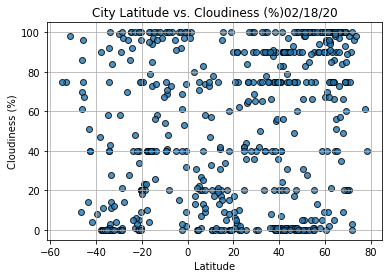

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

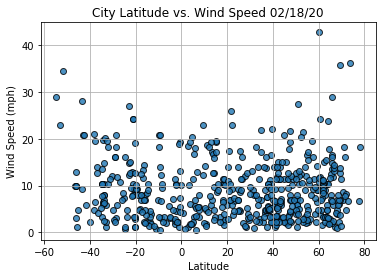

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

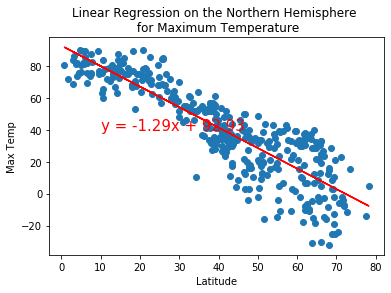

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

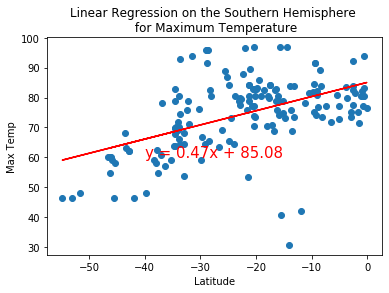

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-40,60))

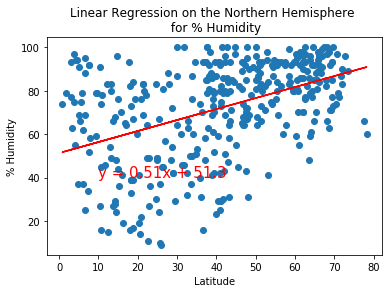

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(10,40))

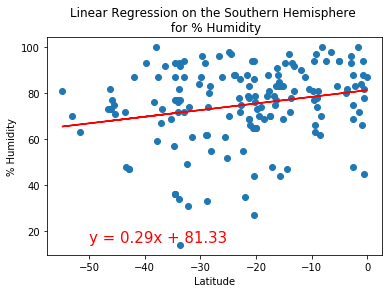

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

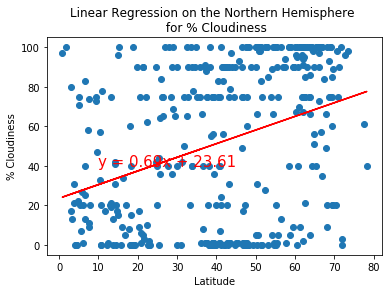

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,40))

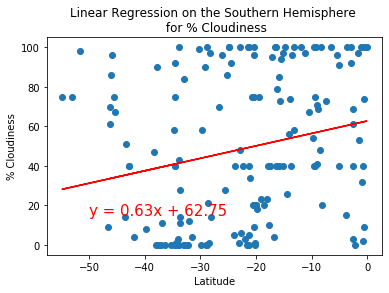

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

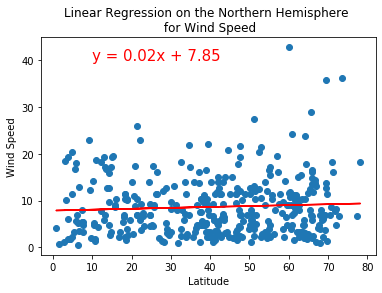

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,40))

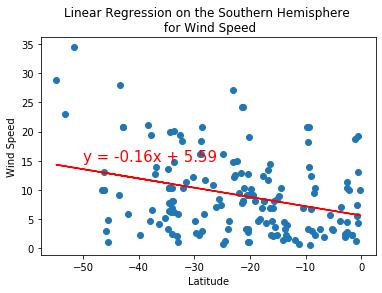

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))